In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

from numpy import cos, pi, sqrt
from mpl_toolkits.mplot3d import Axes3D

**Для двух катушек состоящих из одного витка: R1 = 2.5 см, R2 = 1.5 ... 6 см**

In [2]:
N = 200
K = 200
R1 = 2.5
R2 = np.linspace(0.5, 6, 100)
u = 1
d = 0.5
M = 0
df1 = 2 * pi / N
df2 = 2 * pi / K


for n in range(N):
    for k in range(K):
        M += cos(k * df2 - n * df1) / (R1 ** 2 + R2 ** 2 - 2 * R1 * R2 * cos(n * df1 - k * df2) + d ** 2)

M *= u * R1 * R2 / (4 * pi)

**Hill climbing algorithm**

In [47]:
def mutation(start, finish, value, alpha=3):
    value = np.random.uniform(low = start if value - alpha < start else value - alpha,
                              high = finish if value + alpha > finish else value + alpha)
    return value

def func(R2, N=200, K=200, u=1, R1=2.5, d=0.5):
    M = 0
    for n in range(N):
        for k in range(K):
            M += cos(k * df2 - n * df1) / (R1 ** 2 + R2 ** 2 - 2 * R1 * R2 * cos(n * df1 - k * df2) + d ** 2)
    M *= u * R1 * R2 / (4 * pi)
    return M


iteration = 0
r2 = np.random.uniform(low=0.5, high=6)

while iteration != 20:
    f = func(r2)
    r2_mutation = mutation(start=0.5, finish=6, value=r2)
    f_mutation = func(r2_mutation)
    r2 = r2 if f >= f_mutation else r2_mutation
    iteration += 1
    if iteration % 1 == 0:
        print("Value function:", func(r2), "R2:", r2, "iteration:", iteration)

Value function: 1428.546244853796 R2: 4.408954811171675 iteration: 1
Value function: 1473.7567376833376 R2: 1.4910538196857683 iteration: 2
Value function: 3725.0525860831003 R2: 3.2244844491502644 iteration: 3
Value function: 3725.0525860831003 R2: 3.2244844491502644 iteration: 4
Value function: 3725.0525860831003 R2: 3.2244844491502644 iteration: 5
Value function: 3725.0525860831003 R2: 3.2244844491502644 iteration: 6
Value function: 3725.0525860831003 R2: 3.2244844491502644 iteration: 7
Value function: 6520.792503377754 R2: 2.5634154122440145 iteration: 8
Value function: 6520.792503377754 R2: 2.5634154122440145 iteration: 9
Value function: 6520.792503377754 R2: 2.5634154122440145 iteration: 10
Value function: 6520.792503377754 R2: 2.5634154122440145 iteration: 11
Value function: 6520.792503377754 R2: 2.5634154122440145 iteration: 12
Value function: 6520.792503377754 R2: 2.5634154122440145 iteration: 13
Value function: 6520.792503377754 R2: 2.5634154122440145 iteration: 14
Value func

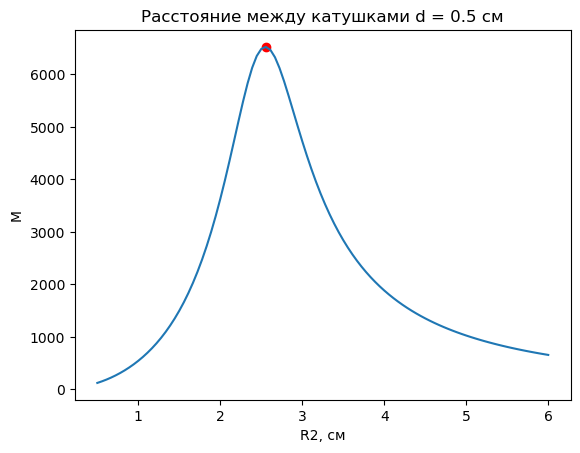

In [48]:
plt.title("Расстояние между катушками d = 0.5 см")
plt.plot(R2, M)
plt.scatter(r2, func(r2), c="red")
plt.xlabel("R2, см")
plt.ylabel("M")
plt.show()

In [70]:
def mutual_inductance(R2, N=360, K=360,
                      R1=2, df1 = 2*pi/N, df2=2*pi/K):
    M = 0
    for n in range(N):
        for k in range(K):
            M += (cos(df2 * k - df1 * n) * df1 * df2) / (R1 ** 2 + R2 ** 2 - 2 * R1 * R2 * cos(df1 * n - df2 * k)) ** 0.5
    M *= R1 * R2 / (4 * pi)
    return M

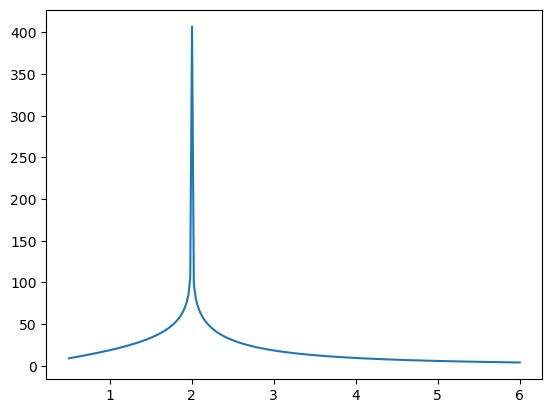

In [71]:
R2 = np.linspace(0.5, 6, 250)
M = mutual_inductance(R2, R1=2)
plt.plot(R2, M)

In [58]:
(R2[np.argmax(M)] - R1) / (R1 + R2[np.argmax(M)])

0.0004182350480970261